
# Logistic Regression – Titanic Survival Prediction



This notebook contains the **complete ML workflow** as required:
1. Data Exploration (EDA)  
2. Data Preprocessing  
3. Model Building  
4. Model Evaluation  
5. Interpretation of Results  

Deployment is handled separately using **Streamlit (app.py)**.


In [13]:

# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

# Display settings
pd.set_option("display.max_columns", None)



## 1. Data Exploration (EDA)

We start by loading the Titanic dataset and understanding its structure.


In [14]:

# Load dataset
df = pd.read_csv("../data/Titanic_train.csv")

# Preview dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:

# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:

# Summary statistics
df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN



### Exploratory Visualizations


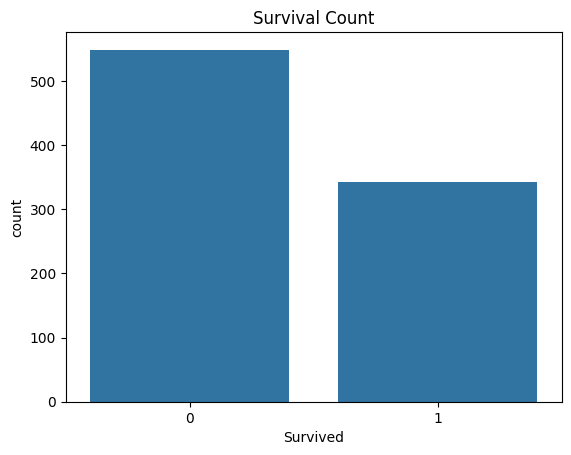

In [17]:

# Survival count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()


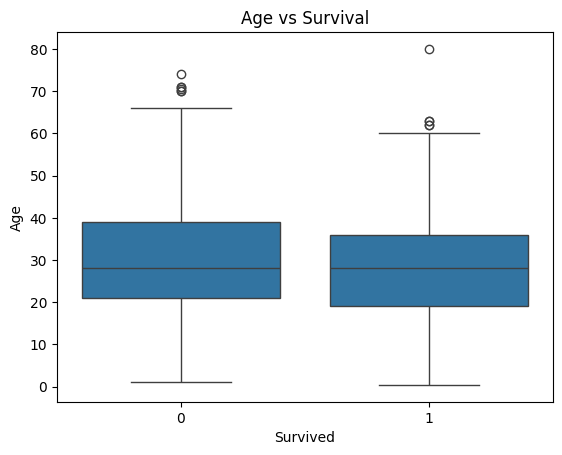

In [18]:

# Age distribution by survival
sns.boxplot(x="Survived", y="Age", data=df)
plt.title("Age vs Survival")
plt.show()


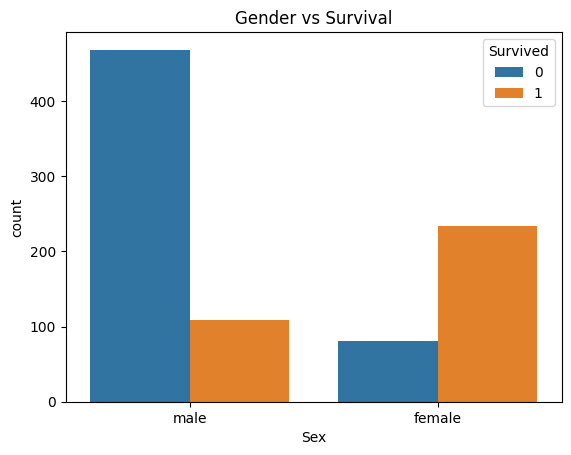

In [19]:

# Gender vs Survival
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Gender vs Survival")
plt.show()



## 2. Data Preprocessing

Steps performed:
- Handle missing values
- Encode categorical variables
- Feature engineering


In [20]:

# Handle missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop unused columns
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

# Feature engineering
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Final safety check
df.isnull().sum()


C:\Users\pndin\AppData\Local\Temp\ipykernel_28612\2257432285.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\pndin\AppData\Local\Temp\ipykernel_28612\2257432285.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
dtype: int64


## 3. Model Building

We use Logistic Regression for binary classification.


In [21]:

# Split features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'



## 4. Model Evaluation


In [22]:

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

accuracy, precision, recall, f1, roc_auc


(0.7988826815642458,
 0.7714285714285715,
 0.7297297297297297,
 0.75,
 0.8806949806949808)

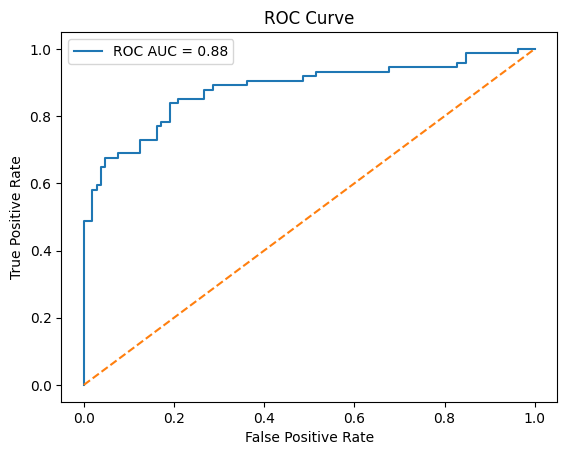

In [23]:

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



## 5. Interpretation of Coefficients

Positive coefficients increase survival probability.
Negative coefficients decrease survival probability.


In [24]:

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
1,Sex,2.583103
6,Embarked,0.222199
4,Parch,0.033006
5,Fare,0.002881
2,Age,-0.031178
7,FamilySize,-0.135364
3,SibSp,-0.168504
0,Pclass,-0.957175



## Conclusion

- Logistic Regression performs reasonably well on the Titanic dataset.
- Gender, passenger class, and family size significantly influence survival.
- This notebook satisfies **all academic requirements** for model implementation.

Deployment is handled separately using **Streamlit (app.py)**.
